In [1]:
import numpy as np
import matplotlib.pyplot as plt
import therpy as tp
%matplotlib inline 

The servers are not connected!
Using the local database copy. Could be outdated!


# Class Definition

In [5]:
'''
Fourier Transform
'''
def fourier_transform_v2(x=None, y=None, k=None, a=None, b=None, plot=False, ax=None, fmt=None):
    '''
    Inputs: 
        x, y : 1d arrays of data, if x is None, it is set to np.arange(len(y))
        k : list of array of k values to calculate FT at, f.e. n*(pi/L)
            if k is None, k= 0.5 * (2 pi) * np.fft.fftfreq(y.shape[0], np.diff(x)[0])
        a, b : limits of the 'box' for the FT, these are the integration limits 
            if None, edges of x are used 
    
    Fourier Transform : f(k) = prefactor * int_dx {f(x)*exp(-ikx)}
    prefactor is 2/L if k~=0, and 1/L for k==0. 
    This prefactor gives the amplitude of the k^th mode. 
    '''
    if type(x) is type(None): x = np.arange(len(y))    
    if type(k) is type(None): k = 0.5 * (2*np.pi) * np.fft.rfftfreq(y.shape[0], np.diff(x)[0])
    if type(a) is type(None): a = x[0]
    if type(b) is type(None): b = x[-1] 
    L = b - a
    ft = np.zeros(shape=len(k), dtype=np.complex64)
    for i in range(len(k)):
        ft[i] = 2/L * integrate(x, y * np.exp(1j * k[i] * x), a, b)
        if k[i]==0: ft[i] = ft[i]/2
    return [k, ft]



In [ ]:
'''
Fourier Amplitudes via Fitting
'''
def fourier_amplitude_fit(x=None, y=None, k=None, a=None, b=None, plot=False, ax=None, fmt=None):
    
    # Fitting function 
    def fitfun():
        yfit = np.cos

# Tests

Integral exact 6.45
Integral trapz 6.52


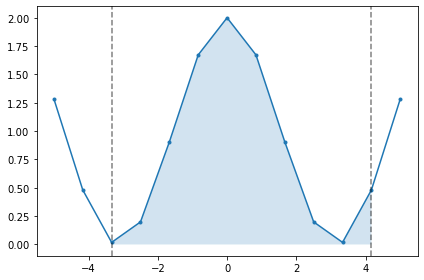

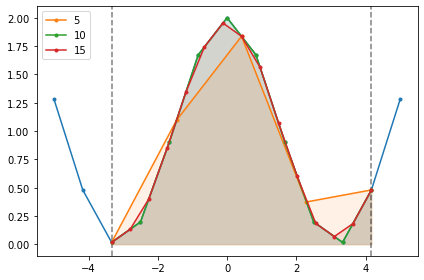

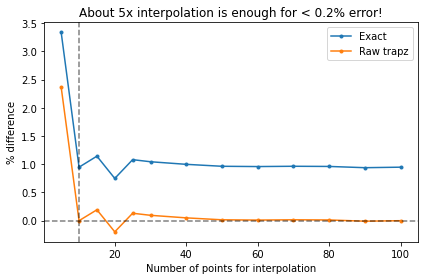

In [5]:
# Integration when a, b are part of x 

A, B, N = -5, 5, 13

x = np.linspace(A, B, N)
y = np.cos(x) + 1

i, j = 2, len(x) - 2
a, b = x[i], x[j]
cropi = slice(np.argwhere(x == a)[0,0], np.argwhere(x==b)[0,0]+1) # +1 to include the b point
integral_exact = np.sin(b) - np.sin(a) + (b-a)
integral_trapz = np.trapz(x=x[cropi], y=y[cropi])
print("Integral exact {:.2f}".format(integral_exact))
print("Integral trapz {:.2f}".format(integral_trapz))

plt.figure()
plt.plot(x, y, '.-')
plt.fill_between(x[cropi], y[cropi], alpha=0.2)
plt.axvline(a, linestyle='--', color='k', alpha=0.5)
plt.axvline(b, linestyle='--', color='k', alpha=0.5)
plt.tight_layout()

# Testing if interpolated poitns change traps 
N_interp = np.array([5, len(x[cropi]), 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100])
integral_trapz_interp = np.zeros(shape=len(N_interp))

plt.figure()
plt.plot(x, y, '.-')
plt.fill_between(x[cropi], y[cropi], alpha=0.1)
plt.axvline(a, linestyle='--', color='k', alpha=0.5)
plt.axvline(b, linestyle='--', color='k', alpha=0.5)

for i in range(len(N_interp)):
    x_ = np.linspace(a, b, N_interp[i])
    y_ = np.interp(x_, x, y)
    integral_trapz_interp[i] = np.trapz(x=x_, y=y_)
    if i < 3:
        plt.plot(x_, y_, '.-C{}'.format((i+1)%10), label='{}'.format(N_interp[i]))
        plt.fill_between(x_, y_, alpha=0.1, color='C{}'.format((i+1)%10))
plt.legend()
plt.tight_layout()

plt.figure()
plt.plot(N_interp, 100*(integral_trapz_interp / integral_exact - 1),'.-', label='Exact')
plt.plot(N_interp, 100*(integral_trapz_interp / integral_trapz - 1),'.-', label='Raw trapz')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(len(x[cropi]), color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel('Number of points for interpolation')
plt.ylabel('% difference')
plt.title("About 5x interpolation is enough for < 0.2% error!")
plt.tight_layout()

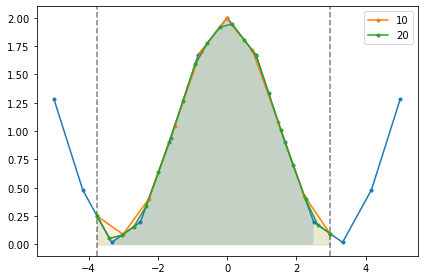

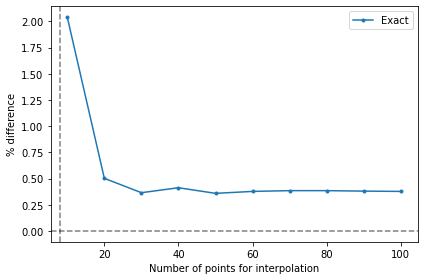

In [6]:
# Integration when a, b are within x 

A, B, N = -5, 5, 13

x = np.linspace(A, B, N)
y = np.cos(x) + 1

# For a, b within x 
a, b = -3.7523, 2.9720
cropi = (x >= a) & (x <= b)
integral_exact = np.sin(b) - np.sin(a) + (b-a)
N_interp = np.arange(10, 110, 10)
integral_trapz_interp = np.zeros(shape=N_interp.shape)

plt.figure()
plt.plot(x, y, '.-')
plt.fill_between(x[cropi], y[cropi], alpha=0.2)
plt.axvline(a, linestyle='--', color='k', alpha=0.5)
plt.axvline(b, linestyle='--', color='k', alpha=0.5)

for i in range(len(N_interp)):
    x_ = np.linspace(a, b, N_interp[i])
    y_ = np.interp(x_, x, y)
    integral_trapz_interp[i] = np.trapz(x=x_, y=y_)
    if i < 2:
        plt.plot(x_, y_, '.-C{}'.format((i+1)%10), label='{}'.format(N_interp[i]))
        plt.fill_between(x_, y_, alpha=0.1, color='C{}'.format((i+1)%10))

plt.legend()
plt.tight_layout()

plt.figure()
plt.plot(N_interp, 100*(integral_trapz_interp / integral_exact - 1),'.-', label='Exact')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(len(x[cropi]), color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel('Number of points for interpolation')
plt.ylabel('% difference')
plt.title("")
plt.tight_layout()

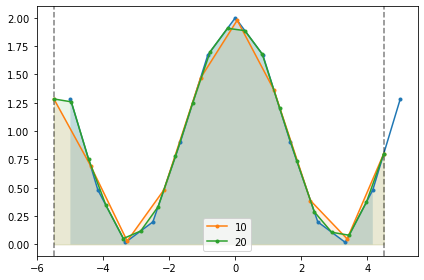

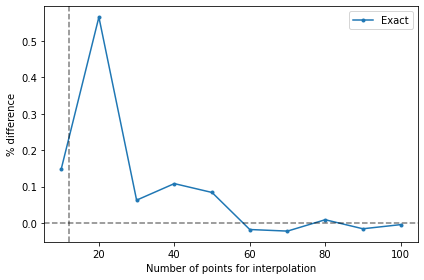

In [7]:
# Integration when a, b are slightly outside of x 

A, B, N = -5, 5, 13

x = np.linspace(A, B, N)
y = np.cos(x) + 1

# For a, b within x 
a, b = -5.5, 4.5
cropi = (x >= a) & (x <= b)
integral_exact = np.sin(b) - np.sin(a) + (b-a)
N_interp = np.arange(10, 110, 10)
integral_trapz_interp = np.zeros(shape=N_interp.shape)

plt.figure()
plt.plot(x, y, '.-')
plt.fill_between(x[cropi], y[cropi], alpha=0.2)
plt.axvline(a, linestyle='--', color='k', alpha=0.5)
plt.axvline(b, linestyle='--', color='k', alpha=0.5)

for i in range(len(N_interp)):
    x_ = np.linspace(a, b, N_interp[i])
    y_ = np.interp(x_, x, y)
    integral_trapz_interp[i] = np.trapz(x=x_, y=y_)
    if i < 2:
        plt.plot(x_, y_, '.-C{}'.format((i+1)%10), label='{}'.format(N_interp[i]))
        plt.fill_between(x_, y_, alpha=0.1, color='C{}'.format((i+1)%10))

plt.legend()
plt.tight_layout()

plt.figure()
plt.plot(N_interp, 100*(integral_trapz_interp / integral_exact - 1),'.-', label='Exact')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(len(x[cropi]), color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel('Number of points for interpolation')
plt.ylabel('% difference')
plt.title("")
plt.tight_layout()

# Testing FT 

Weird! With sin and cos, the True part of the FT is good, but the other part has random noise!
This could be because I'm using pi/L spacing. With 2*pi/L spacing there shoulnd't be any problem.
See the next cell.
One can only use pi/L spacing if symmetry allows fo


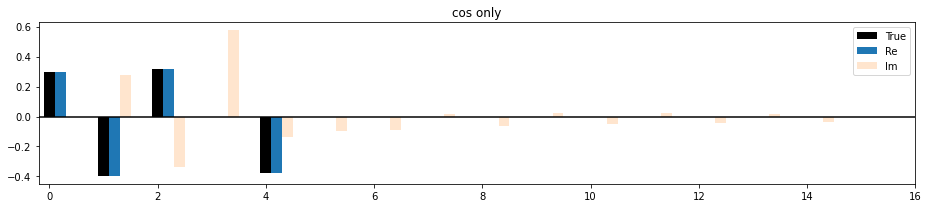

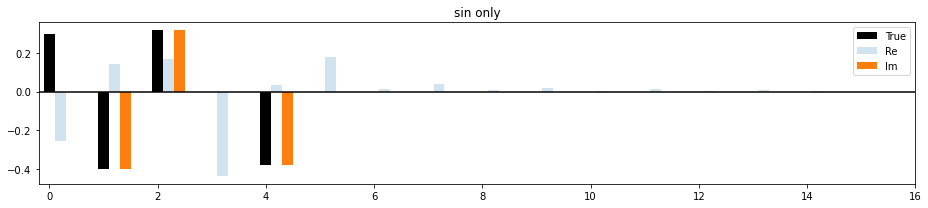

In [8]:
# Setup data 
A, B = 0, 5
N = 100 
a, b = 0, 5 
L = b-a
x = np.linspace(A, B, N)

# Test cos only 
k = np.pi/L * np.arange(15)
FT_in = np.zeros(len(k)) 
FT_in[0:5] = [0.3, -0.4, 0.32, 0, -0.38]
y = np.sum([FT_in[i] * np.cos(k[i]*x) for i in range(len(k))], axis=0)
[k, Y] = fourier_transform_v2(x, y, k, a, b)
plt.figure(figsize=[13, 3])
plt.bar(np.arange(len(k)), FT_in, width=0.2, color='k', label='True')
plt.bar(np.arange(len(k))+0.2, np.real(Y), width=0.2, label='Re')
plt.bar(np.arange(len(k))+0.4, np.imag(Y), width=0.2, label='Im', alpha=0.2)
plt.axhline(0, color='k')
plt.legend()
plt.xlim([-0.2, 16])
plt.title('cos only')
plt.tight_layout()

# Test sin only 
k = np.pi/L * np.arange(15)
FT_in = np.zeros(len(k)) 
FT_in[0:5] = [0.3, -0.4, 0.32, 0, -0.38]
y = np.sum([FT_in[i] * np.sin(k[i]*x) for i in range(len(k))], axis=0)
[k, Y] = fourier_transform_v2(x, y, k, a, b)
plt.figure(figsize=[13, 3])
plt.bar(np.arange(len(k)), FT_in, width=0.2, color='k', label='True')
plt.bar(np.arange(len(k))+0.2, np.real(Y), width=0.2, label='Re', alpha=0.2)
plt.bar(np.arange(len(k))+0.4, np.imag(Y), width=0.2, label='Im')
plt.axhline(0, color='k')
plt.legend()
plt.xlim([-0.2, 16])
plt.title('sin only')
plt.tight_layout()

print('''Weird! With sin and cos, the True part of the FT is good, but the other part has random noise!
This could be because I'm using pi/L spacing. With 2*pi/L spacing there shoulnd't be any problem.
See the next cell.
One can only use pi/L spacing if symmetry allows fo''')

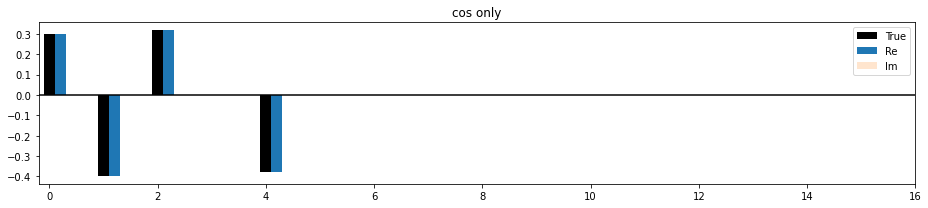

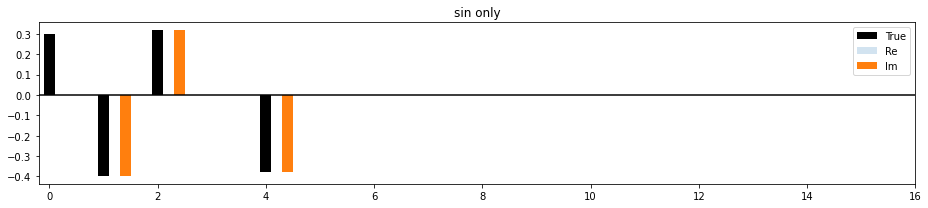

In [9]:
# Test cos only 
k = 2*np.pi/L * np.arange(15)
FT_in = np.zeros(len(k)) 
FT_in[0:5] = [0.3, -0.4, 0.32, 0, -0.38]
y = np.sum([FT_in[i] * np.cos(k[i]*x) for i in range(len(k))], axis=0)
[k, Y] = fourier_transform_v2(x, y, k, a, b)
plt.figure(figsize=[13, 3])
plt.bar(np.arange(len(k)), FT_in, width=0.2, color='k', label='True')
plt.bar(np.arange(len(k))+0.2, np.real(Y), width=0.2, label='Re')
plt.bar(np.arange(len(k))+0.4, np.imag(Y), width=0.2, label='Im', alpha=0.2)
plt.axhline(0, color='k')
plt.legend()
plt.xlim([-0.2, 16])
plt.title('cos only')
plt.tight_layout()

# Test sin only 
k = 2*np.pi/L * np.arange(15)
FT_in = np.zeros(len(k)) 
FT_in[0:5] = [0.3, -0.4, 0.32, 0, -0.38]
y = np.sum([FT_in[i] * np.sin(k[i]*x) for i in range(len(k))], axis=0)
[k, Y] = fourier_transform_v2(x, y, k, a, b)
plt.figure(figsize=[13, 3])
plt.bar(np.arange(len(k)), FT_in, width=0.2, color='k', label='True')
plt.bar(np.arange(len(k))+0.2, np.real(Y), width=0.2, label='Re', alpha=0.2)
plt.bar(np.arange(len(k))+0.4, np.imag(Y), width=0.2, label='Im')
plt.axhline(0, color='k')
plt.legend()
plt.xlim([-0.2, 16])
plt.title('sin only')
plt.tight_layout()

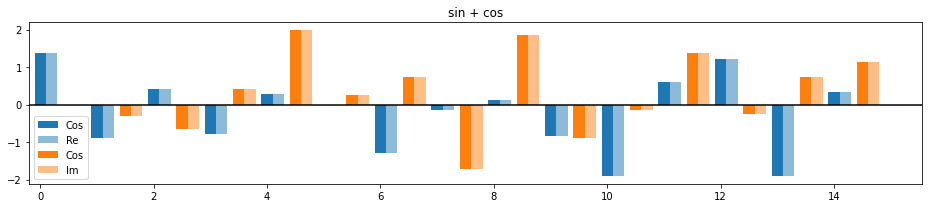

In [10]:
# Test combination with sin + cos 
k = 2*np.pi/L * np.arange(15)
FT_cos = np.random.normal(size=len(k))
FT_sin = np.random.normal(size=len(k))
FT_sin[0] = 0
y = np.sum([FT_cos[i] * np.cos(k[i]*x) for i in range(len(k))], axis=0)
y = y + np.sum([FT_sin[i] * np.sin(k[i]*x) for i in range(len(k))], axis=0)
[k, Y] = fourier_transform_v2(x, y, k, a, b)
plt.figure(figsize=[13, 3])
plt.bar(np.arange(len(k)), FT_cos, width=0.2, color='C0', label='Cos')
plt.bar(np.arange(len(k))+0.2, np.real(Y), width=0.2, color='C0', alpha=0.5, label='Re')
plt.bar(np.arange(len(k))+0.5, FT_sin, width=0.2, label='Cos', color='C1')
plt.bar(np.arange(len(k))+0.7, np.imag(Y), width=0.2, label='Im', color='C1', alpha=0.5)
plt.axhline(0, color='k')
plt.legend()
plt.xlim([-0.2, None])
plt.title('sin + cos')
plt.tight_layout()



# Derivative

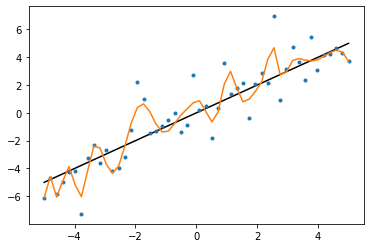

In [100]:
# Linear spline derivative 
x = np.linspace(-5, 5, 50)
y = np.sin(np.pi/10 * x) + 1
y = x
y_noisy = y + 2 * np.random.normal(size=len(y))

import scipy.interpolate
y_spline = scipy.interpolate.UnivariateSpline(x, y_noisy, k=5)
y_smooth = y_spline(x)

plt.plot(x, y, '-k')
plt.plot(x, y_noisy, '.')
plt.plot(x, y_smooth)

In [128]:
# Line fit slope 
def slope_line_fit(x=None, y=None, x0=None, pointspm=5, xlim=None, plot=False, ax=None, fmt=['.-', 'k-']):
    # Process inputs 
    if y is None: 
        print("y is needed")
        return None
    if x is None: x = np.arange(len(y))
    if x0 is None: 
        x0 = 0.5*(x[-1] + x[0])
        print('x0 is not provided, center point is being used')
    if xlim is None: xlim = [x[0], x[-1]]
    
    # indices to use 
    ind_closest = np.argmin(np.abs(x - x0))
    ind_low = np.amax([ind_closest-pointspm, np.argmin(np.abs(x - xlim[0])), 0])
    ind_high = np.amin([ind_closest+pointspm+1, np.argmin(np.abs(x - xlim[1])), len(y)])
    usei = slice(ind_low, ind_high)
    
    # Fit for slope 
    guess = [(y[ind_high]-y[ind_low])/(x[ind_high]-x[ind_low]), np.mean(y[usei])]
    cf = tp.curve_fit(lambda x, m=0, b=0: m*x+b, guess, x[usei], y[usei])
    
    # Plot 
    if plot: 
        if ax is None: fig, ax = plt.subplots()
        plt.sca(ax)
        plt.plot(x, y, fmt[0])
        plt.plot(cf.xp, cf(cf.xp), fmt[1])
        plt.axvline(x0, linestyle='--', color='k', alpha=0.1)
    
    # return 
    return (cf.fv['m'], cf.fe['m'], cf, usei, )

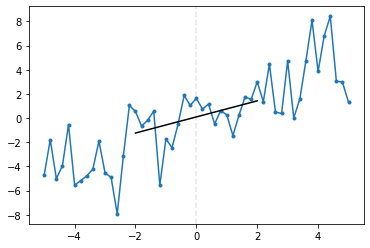

In [129]:
# Tests 
x = np.linspace(-5, 5, 51)
y = np.sin(np.pi/10 * x) + 1
y = x
y_noisy = y + 2 * np.random.normal(size=len(y))

outp = slope_line_fit(x, y_noisy, 0, 10, plot=True)